### Linear Regressioin for Bikes

In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [224]:
df = pd.read_csv('day.csv')

### 1. Data Analysis

In [225]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [226]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [227]:
df.shape

(730, 16)

**Checking Null Values**

In [228]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [230]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**We Observe numeric data does not have extreme values and most of the data is in range of mean (+/-) 3 sigma**

In [231]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Removing casual and registerd as their sum is equal to count which is trivial

In [232]:
df.drop(['casual','registered'],inplace=True,axis=1)

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.0+ KB


#### Removing instance id and date 

In [234]:
df.drop(['instant'],inplace=True,axis=1)

In [235]:
df.drop(['dteday'],inplace=True,axis=1)

In [236]:
df.index

RangeIndex(start=0, stop=730, step=1)

In [237]:
df.set_index('cnt')

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
cnt,,,,,,,,,,,
985,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882
801,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113
1349,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703
1562,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832
1600,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300
...,...,...,...,...,...,...,...,...,...,...,...
2114,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911
3095,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557
1341,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661


In [238]:
def display_countplot(df, x_columns):
    for x_cat_column in x_cat_columns:
        sns.countplot(x=df[x_cat_column])
        plt.show()
        

In [239]:
x_cat_columns=['season','yr','mnth','holiday','weekday','workingday','weathersit']

#### 2. Data Analysis of Categorical Variables

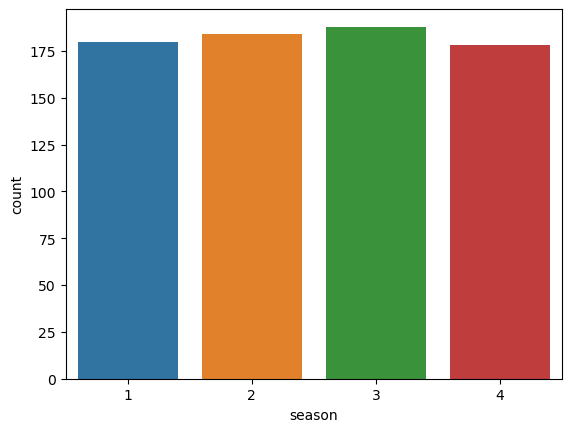

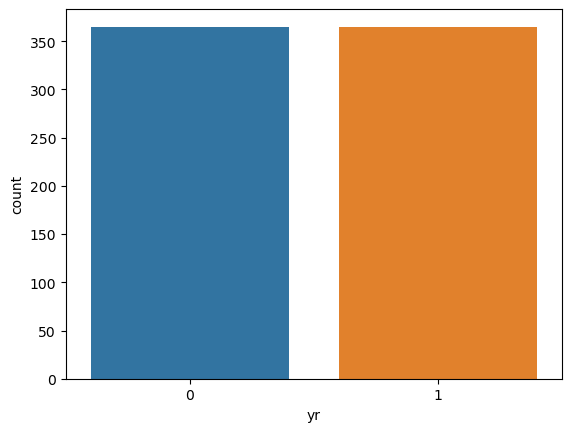

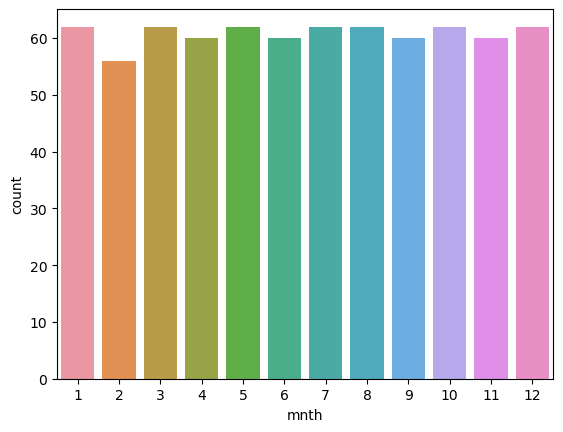

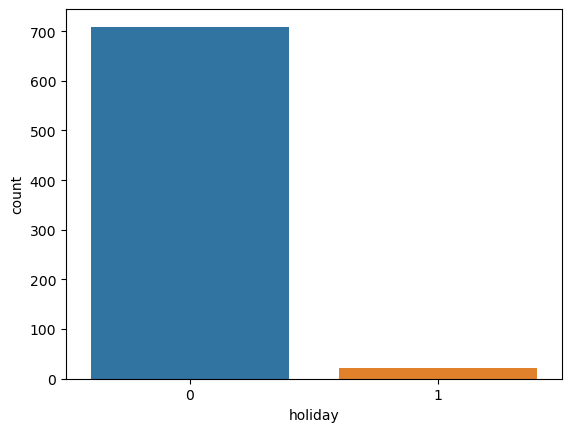

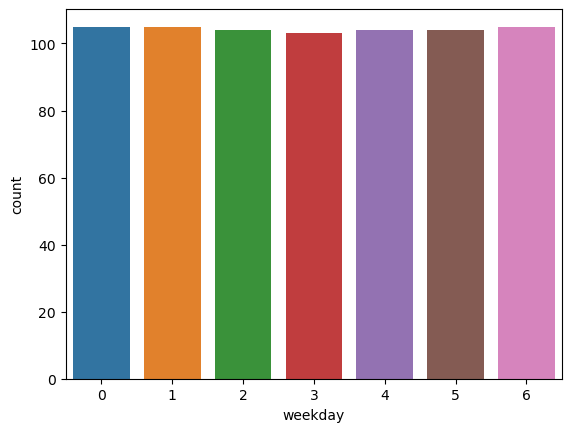

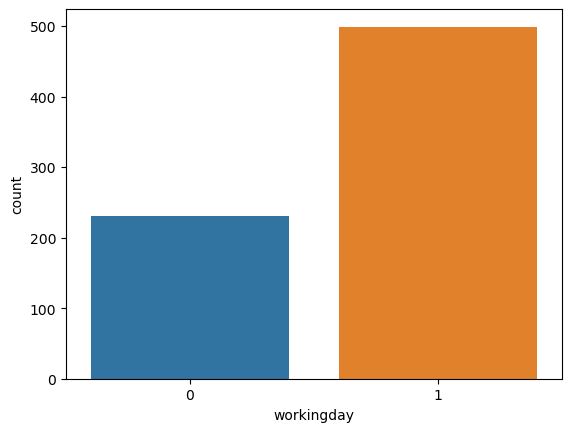

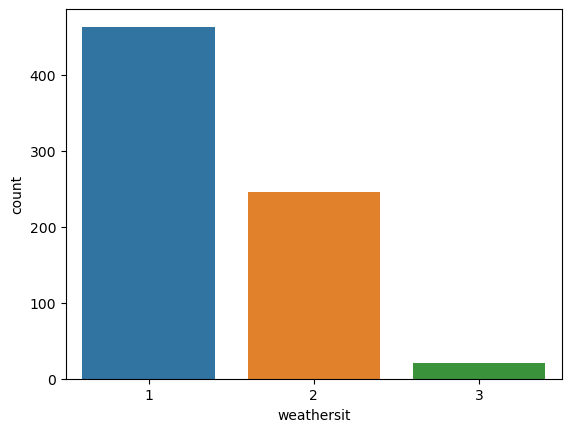

In [240]:
display_countplot(df,x_cat_columns)

#### 3. Data Analysis of Numeric Variables

<Axes: >

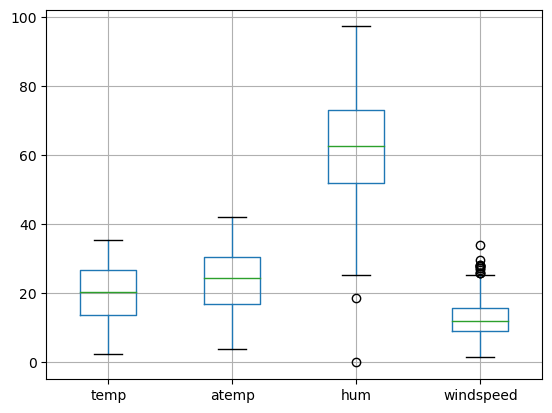

In [241]:
df.boxplot(['temp', 'atemp', 'hum', 'windspeed'])

In [242]:
x_num_columns=['temp','atemp','hum','windspeed']

In [243]:
def display_boxplot(df, x_columns):
    for x_column in x_columns:
        sns.boxplot(x=x_column,data=df)
        plt.show()

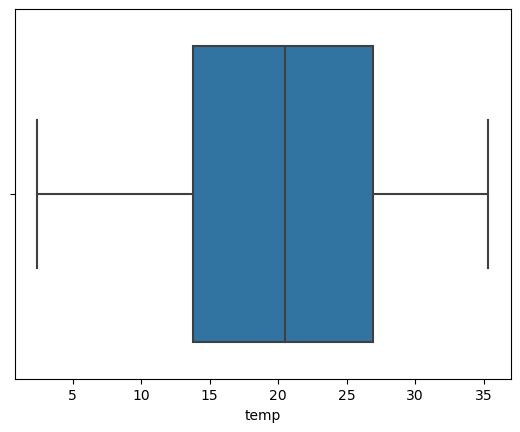

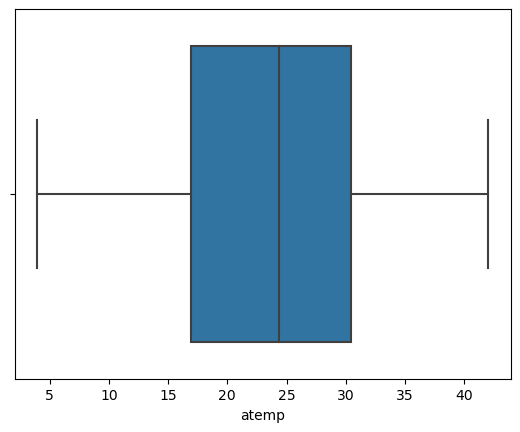

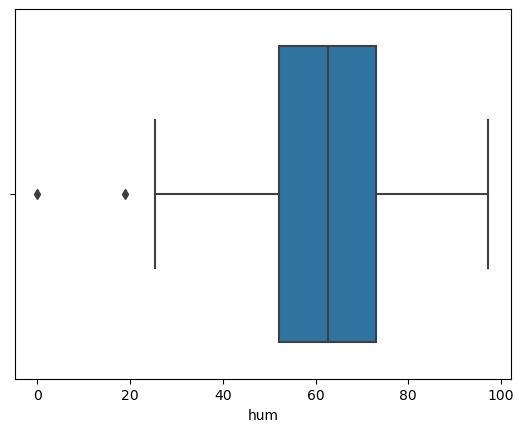

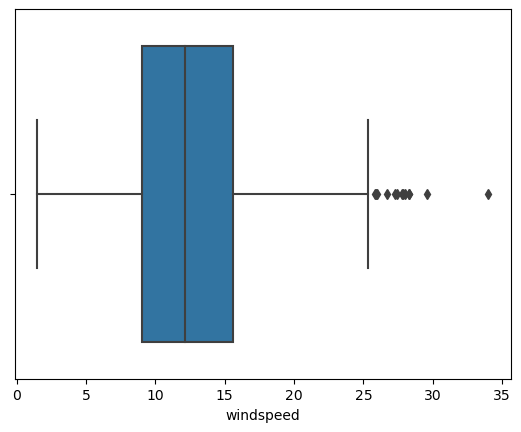

In [244]:
display_boxplot(df, x_num_columns)

In [245]:
def display_distplot(df, x_columns):
    for x_column in x_columns:
        sns.distplot(df[x_column])
        plt.show()

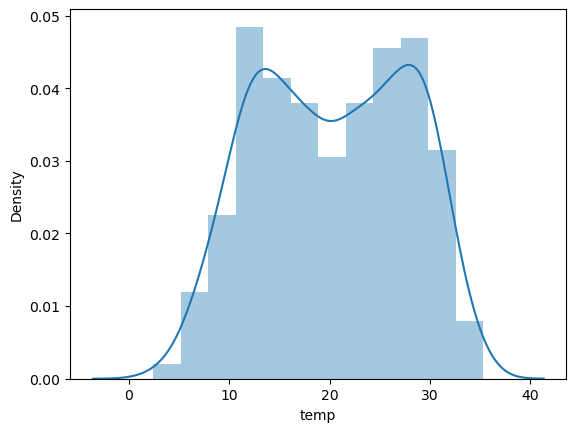

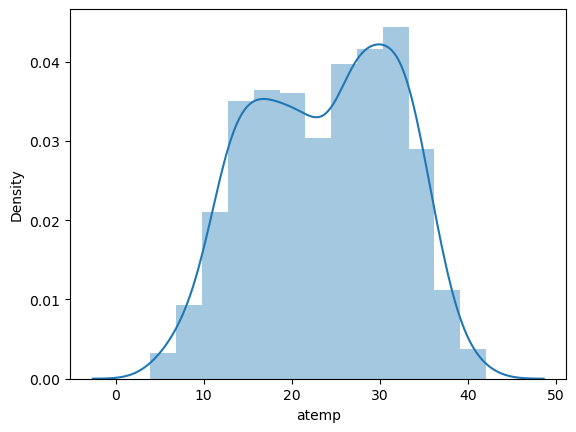

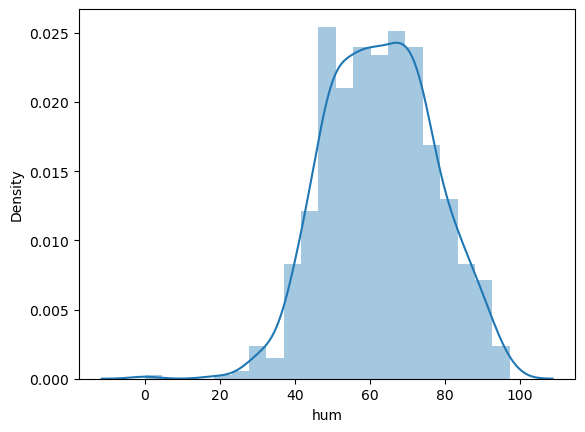

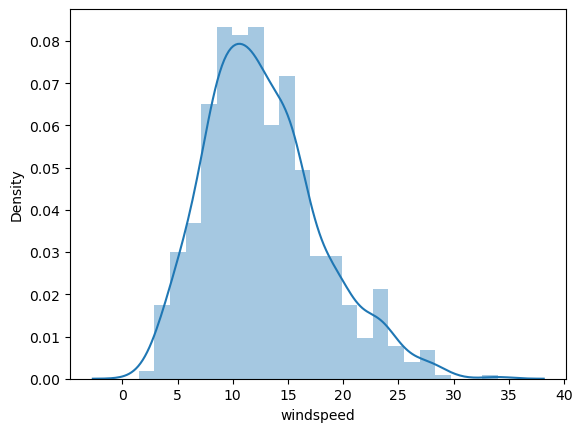

In [246]:
display_distplot(df,x_num_columns)

#### 4.Using pivot charts for mnth,weekday using mean as aggregator for cnt

In [247]:
table = pd.pivot_table(df, values=['cnt'], index=['mnth', 'weathersit'],
                       aggfunc={'cnt': "mean"})
table

cnt
mnth weathersit             
1    1           2361.918919
     2           1959.833333
     3            506.000000
2    1           2839.135135
     2           2350.055556
     3           2169.000000
3    1           3888.583333
     2           3609.291667
     3           1154.000000
4    1           5328.351351
     2           3339.190476
     3            911.000000
5    1           5698.324324
     2           4833.920000
6    1           6061.521739
     2           4822.285714
7    1           5516.980392
     2           5912.300000
     3           4459.000000
8    1           5835.372093
     2           5277.526316
9    1           6733.333333
     2           4885.125000
     3           2182.666667
10   1           5859.281250
     2           4989.080000
     3           2025.600000
11   1           4395.833333
     2           4267.800000
     3           2063.000000
12   1           3503.062500
     2           3525.851852
     3           1246.666667

In [248]:
table2 = pd.pivot_table(df, values=['cnt'], index=['weekday','holiday'],
                       aggfunc={'cnt': "mean"})
table2

cnt
weekday holiday             
0       0        4228.828571
1       0        4398.866667
        1        3973.666667
2       0        4544.621359
        1        1013.000000
3       0        4547.166667
        1        7403.000000
4       0        4720.343137
        1        1960.000000
5       0        4718.588235
        1        3247.000000
6       0        4550.542857

In [249]:
table3 = pd.pivot_table(df, values=['cnt'], index=['weekday','workingday'],
                       aggfunc={'cnt': "mean"})
table3

cnt
weekday workingday             
0       0           4228.828571
1       0           3973.666667
        1           4398.866667
2       0           1013.000000
        1           4544.621359
3       0           7403.000000
        1           4547.166667
4       0           1960.000000
        1           4720.343137
5       0           3247.000000
        1           4718.588235
6       0           4550.542857

<Axes: >

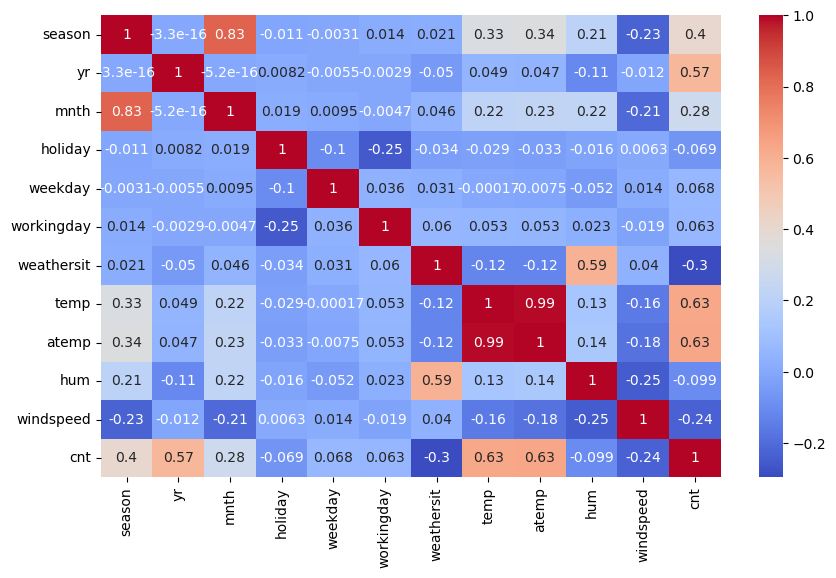

In [250]:
fig,ax= plt.subplots()
fig.set_size_inches(10,6)
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [251]:
from sklearn.metrics import r2_score

#### 5. Scatter plot for numeric variables

<Axes: xlabel='temp', ylabel='cnt'>

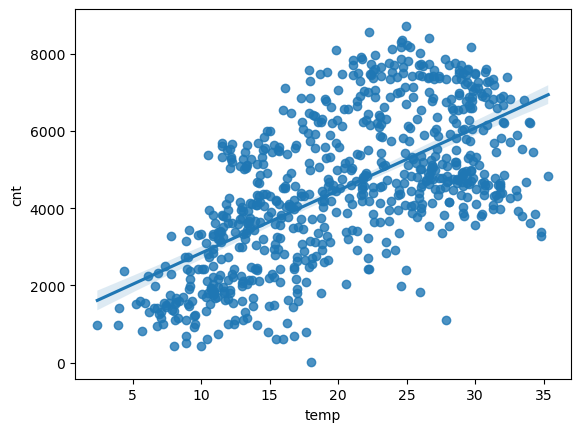

In [252]:
sns.regplot(x='temp',y='cnt',data=df)

<Axes: xlabel='temp', ylabel='atemp'>

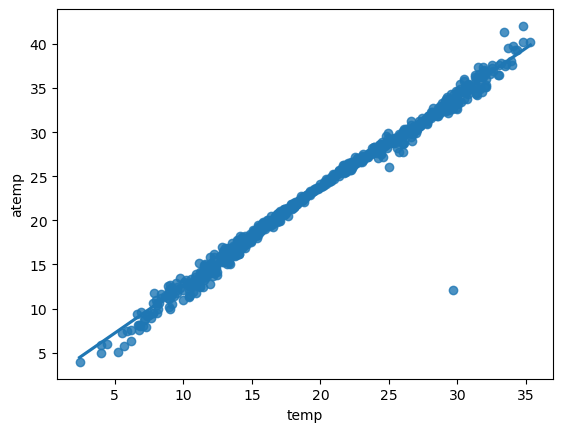

In [253]:
sns.regplot(x='temp',y='atemp',data=df)
#####AS we observed high correlation we will remove one of the variable

In [254]:
df.corr()
#####AS we observed high correlation between temp and atemp we will remove one of the variable during model building

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


In [255]:
df.shape

(730, 12)

<Axes: xlabel='hum', ylabel='cnt'>

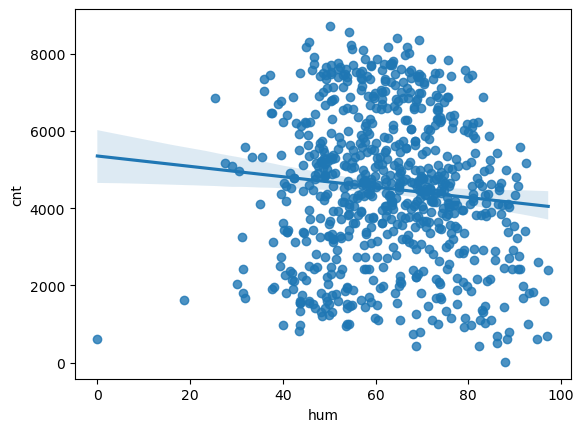

In [256]:
sns.regplot(x='hum',y='cnt',data=df)

<Axes: xlabel='temp', ylabel='cnt'>

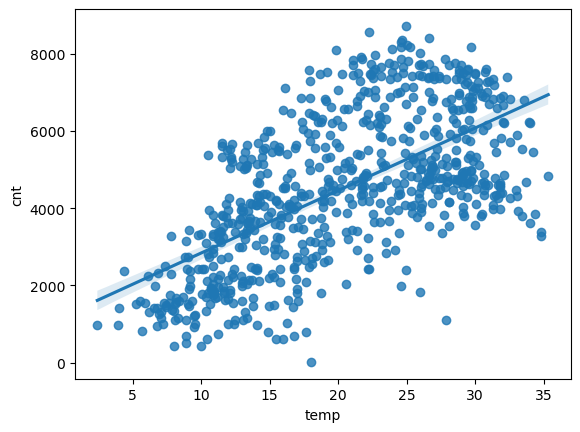

In [257]:
sns.regplot(x='temp',y='cnt',data=df)

<Axes: xlabel='windspeed', ylabel='cnt'>

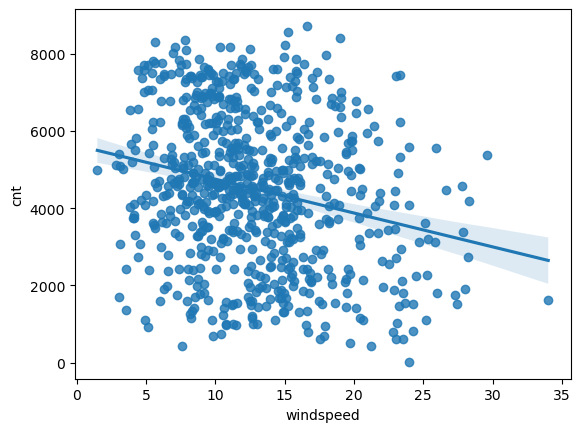

In [258]:
sns.regplot(x='windspeed',y='cnt',data=df)

<Axes: xlabel='atemp', ylabel='cnt'>

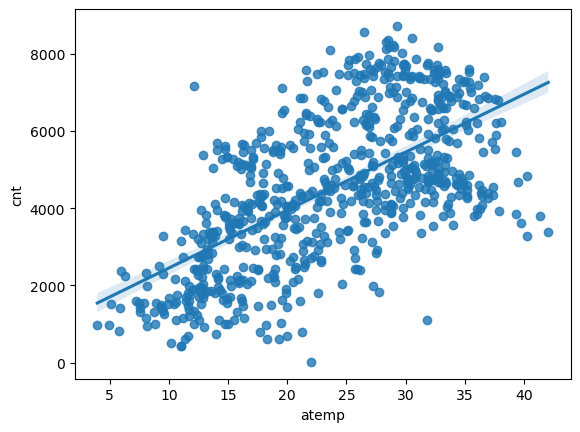

In [259]:
sns.regplot(x='atemp',y='cnt',data=df)

#### 5. Creating Model

In [260]:
import statsmodels

In [261]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

##### Creating Model

Steps:
- Create x and y
- create train and test sets (75-25)
- Train model on the training set
- Evaluate the model (training set as well as test set)

In [262]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [263]:
y=df['cnt']

##### Creating Dummy variables for Categorical values

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [265]:
def season_map(x):
    return x.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

#Applying season categorical value based on Data Dictionary
df[['season']] = df[['season']].apply(season_map)

In [266]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [267]:
def year_map(x):
    return x.map({0: '2018', 1: '2019'})

#Applying year categorical value based on Data Dictionary
df[['yr']] = df[['yr']].apply(year_map)

In [268]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [269]:
def month_map(x):
    return x.map({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

#Applying month categorical value based on Data Dictionary
df[['mnth']] = df[['mnth']].apply(month_map)

In [270]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [271]:
def holiday_map(x):
    return x.map({0: '0', 1: '1'})

#Applying holiday categorical value based on Data Dictionary
df[['holiday']] = df[['holiday']].apply(holiday_map)

In [272]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [273]:
def weekday_map(x):
    return x.map({0: 'sunday', 1: 'monday',2:'tuesday',3:'wednesday',4:'thursday',5:'friday',6:'saturday'})

#Applying weekday categorical value based on Data Dictionary. In pivot Chart from table 2 and table 3 we do not see 
### 1 value for holiday,workingday on 0 and 6 for weekday
df[['weekday']] = df[['weekday']].apply(weekday_map)

In [274]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,saturday,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,sunday,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,monday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,tuesday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,wednesday,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [275]:
def workingday_map(x):
    return x.map({0: 'nonworking', 1: 'working'})

#Applying workingday categorical value based on Data Dictionary and data analysis . workiny days will be more
### than nonworking days
df[['workingday']] = df[['workingday']].apply(workingday_map)

In [276]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,saturday,nonworking,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,sunday,nonworking,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,monday,working,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,tuesday,working,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,wednesday,working,1,9.305237,11.46350,43.6957,12.522300,1600


In [277]:
def weathersit_map(x):
    return x.map({1: 'clear',2:'mist',3:'LightSnow',4:'HeavyRain'})

#Applying weathersit categorical value based on Data Dictionary.
df[['weathersit']] = df[['weathersit']].apply(weathersit_map)

In [278]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,saturday,nonworking,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,sunday,nonworking,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,monday,working,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,tuesday,working,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,wednesday,working,clear,9.305237,11.46350,43.6957,12.522300,1600


In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


In [280]:
x_cat_values=df.select_dtypes(include=['object'])
x_cat_values.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,spring,2018,jan,0,saturday,nonworking,mist
1,spring,2018,jan,0,sunday,nonworking,mist
2,spring,2018,jan,0,monday,working,clear
3,spring,2018,jan,0,tuesday,working,clear
4,spring,2018,jan,0,wednesday,working,clear


In [281]:
x_cat_dummies = pd.get_dummies(x_cat_values, drop_first=True)
x_cat_dummies.head()

,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,...,holiday_1,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,workingday_working,weathersit_clear,weathersit_mist
0,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,1,0


In [282]:
x_cat_dummies.shape

(730, 25)

In [283]:
x_cat_dummies.columns

Index(['season_spring', 'season_summer', 'season_winter', 'yr_2019',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'holiday_1', 'weekday_monday', 'weekday_saturday', 'weekday_sunday',
       'weekday_thursday', 'weekday_tuesday', 'weekday_wednesday',
       'workingday_working', 'weathersit_clear', 'weathersit_mist'],
      dtype='object')

In [284]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [285]:
x_numeric_values=df[['temp','atemp','hum','windspeed']]

In [286]:
x_numeric_values.head()

,temp,atemp,hum,windspeed
0,14.110847,18.18125,80.5833,10.749882
1,14.902598,17.68695,69.6087,16.652113
2,8.050924,9.47025,43.7273,16.636703
3,8.200000,10.60610,59.0435,10.739832
4,9.305237,11.46350,43.6957,12.522300


In [287]:
x_cat_dummies.head()

,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,...,holiday_1,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,workingday_working,weathersit_clear,weathersit_mist
0,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,1,0


In [288]:
x_numeric_values.shape

(730, 4)

In [289]:
x_cat_dummies.shape

(730, 25)

In [290]:
y.shape

(730,)

In [291]:
x_numeric_values.shape

(730, 4)

###### 5.1 Feature Scaling using Standard deviation

In [292]:

scaler=StandardScaler()

In [293]:
x_consolidated = pd.concat([x_numeric_values, x_cat_dummies], axis=1, join='inner')

In [294]:
x_consolidated.drop(['temp'],inplace=True,axis=1)
#####Dropping Temp as it is highly correleated with atemp values

In [295]:
X_train_lm, X_test_lm, Y_train_lm, Y_test_lm = train_test_split(x_consolidated, y, train_size = 0.75, test_size = 0.25, random_state = 100)

In [296]:
X_train_lm[['atemp','hum','windspeed']]=scaler.fit_transform(X_train_lm[['atemp','hum','windspeed']])

In [297]:
X_test_lm[['atemp','hum','windspeed']]=scaler.transform(X_test_lm[['atemp','hum','windspeed']])

In [298]:
X_train_lm.head()

,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,mnth_feb,...,holiday_1,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,workingday_working,weathersit_clear,weathersit_mist
311,-0.350016,0.644081,-1.548612,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
523,0.801459,-1.166982,-0.196494,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
381,-0.647587,0.604256,2.012594,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
413,-0.702507,-0.691174,0.001164,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
253,0.871975,0.587576,-0.963540,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [299]:
X_train_sm=sm.add_constant(X_train_lm)

In [300]:
X_train_sm.head()

,const,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,...,holiday_1,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,workingday_working,weathersit_clear,weathersit_mist
311,1.0,-0.350016,0.644081,-1.548612,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
523,1.0,0.801459,-1.166982,-0.196494,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
381,1.0,-0.647587,0.604256,2.012594,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
413,1.0,-0.702507,-0.691174,0.001164,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
253,1.0,0.871975,0.587576,-0.963540,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


#### 5.2 Creating Linearing Regression using Stats Model

In [301]:
lr=sm.OLS(Y_train_lm,X_train_sm)

In [302]:
lr_model =lr.fit()

In [303]:
lr_model.params

const                  898.541092
atemp                  771.420855
hum                   -178.311050
windspeed             -238.336399
season_spring         -505.081069
season_summer          321.650389
season_winter          952.265632
yr_2019               2021.788679
mnth_aug               372.546958
mnth_dec              -507.586836
mnth_feb              -302.577613
mnth_jan              -564.736198
mnth_jul              -118.034214
mnth_jun               269.523567
mnth_mar                29.885792
mnth_may               276.575411
mnth_nov              -432.857813
mnth_oct                84.308291
mnth_sept              827.769687
holiday_1             -246.599267
weekday_monday        -239.586250
weekday_saturday       515.912583
weekday_sunday          44.919655
weekday_thursday      -117.480089
weekday_tuesday       -214.576513
weekday_wednesday      -91.932058
workingday_working     584.308120
weathersit_clear      2235.921726
weathersit_mist       1707.627825
dtype: float64

In [304]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.4
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          2.38e-197
Time:                        16:34:39   Log-Likelihood:                -4394.9
No. Observations:                 547   AIC:                             8846.
Df Residuals:                     519   BIC:                             8966.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                898.5411    267.270      3.362      0.001     373.476    1423.606
atemp                771.4209     79.538      9.699      0.000     615.165     927.677
hum                 -178.3110     47.091     -3.787      0.000    -270.823     -85.799
windspeed           -238.3364     36.267     -6.572      0.000    -309.584    -167.089
season_spring       -505.0811    247.814     -2.038      0.042    -991.923     -18.239
season_summer        321.6504    218.004      1.475      0.141    -106.629     749.929
season_winter        952.2656    229.775      4.144      0.000     500.863    1403.668
yr_2019             2021.7887     67.042     30.157      0.000    1890.082    2153.495
mnth_aug             372.5470    278.006      1.340      0.181    -173.608     918.702
mnth_dec            -507.5868    277.885     -1.827      0.068   -1053.504      38.330
mnth_feb            -302.5776    273.545     -1.106      0.269    -839.968     234.813
mnth_jan            -564.7362    280.479     -2.013      0.045   -1115.750     -13.723
mnth_jul            -118.0342    290.207     -0.407      0.684    -688.160     452.091
mnth_jun             269.5236    198.761      1.356      0.176    -120.952     659.999
mnth_mar              29.8858    210.701      0.142      0.887    -384.046     443.817
mnth_may             276.5754    175.622      1.575      0.116     -68.441     621.592
mnth_nov            -432.8578    303.807     -1.425      0.155   -1029.701     163.985
mnth_oct              84.3083    297.139      0.284      0.777    -499.435     668.052
mnth_sept            827.7697    266.890      3.102      0.002     303.453    1352.087
holiday_1           -246.5993    193.084     -1.277      0.202    -625.921     132.723
weekday_monday      -239.5862    128.243     -1.868      0.062    -491.525      12.353
weekday_saturday     515.9126    108.700      4.746      0.000     302.366     729.459
weekday_sunday        44.9197    110.388      0.407      0.684    -171.942     261.781
weekday_thursday    -117.4801    131.075     -0.896      0.371    -374.983     140.023
weekday_tuesday     -214.5765    129.664     -1.655      0.099    -469.307      40.154
weekday_wednesday    -91.9321    126.801     -0.725      0.469    -341.039     157.174
workingday_working   584.3081     98.310      5.944      0.000     391.173     777.443
weathersit_clear    2235.9217    227.617      9.823      0.000    1788.758    2683.086
weathersit_mist     1707.6278    215.542      7.922      0.000    1284.185    2131.071
==============================================================================
Omnibus:                       93.579   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              285.535
Skew:                          -0.805   Prob(JB):             

#### Checking VIF of the variables

In [305]:
vif=pd.DataFrame()
vif['Features']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif=vif.sort_values(by="VIF",ascending =False)
vif

,Features,VIF
21,weekday_saturday,inf
26,workingday_working,inf
22,weekday_sunday,inf
19,holiday_1,inf
27,weathersit_clear,11.32
4,season_spring,10.94
28,weathersit_mist,9.83
6,season_winter,9.09
5,season_summer,8.18
17,mnth_oct,6.58


##### Creating Another Model by dropping features wityh high VIF and features significance

In [306]:
###### Based on pvalues and VIF we can delete few columns that are highly correleated
##### example weekday_saturday, weekday_sunday
### Creating Second Model
X_train_DropVIF=X_train_sm.drop(['weekday_saturday','weekday_sunday'],axis=1)
#Create Model
lr_dropvif=sm.OLS(Y_train_lm,X_train_DropVIF)
#fit
lr_model_drop=lr_dropvif.fit()
# Summary and Parameters
lr_model_drop.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     113.0
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          4.10e-195
Time:                        16:34:41   Log-Likelihood:                -4402.9
No. Observations:                 547   AIC:                             8860.
Df Residuals:                     520   BIC:                             8976.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1208.3667    333.554      3.623      0.000     553.088    1863.645
atemp                777.8508     80.614      9.649      0.000     619.481     936.220
hum                 -190.8210     47.629     -4.006      0.000    -284.389     -97.253
windspeed           -233.2527     36.742     -6.348      0.000    -305.433    -161.072
season_spring       -511.0036    251.216     -2.034      0.042   -1004.527     -17.480
season_summer        333.3523    220.980      1.509      0.132    -100.772     767.476
season_winter        968.4482    232.896      4.158      0.000     510.916    1425.980
yr_2019             2019.5768     67.961     29.717      0.000    1886.065    2153.088
mnth_aug             399.0564    281.745      1.416      0.157    -154.441     952.554
mnth_dec            -478.1464    281.602     -1.698      0.090   -1031.364      75.071
mnth_feb            -289.7586    277.285     -1.045      0.297    -834.496     254.978
mnth_jan            -529.5128    284.189     -1.863      0.063   -1087.813      28.787
mnth_jul            -109.6794    294.189     -0.373      0.709    -687.624     468.265
mnth_jun             264.8955    201.490      1.315      0.189    -130.939     660.730
mnth_mar              59.6544    213.459      0.279      0.780    -359.693     479.002
mnth_may             270.5462    178.029      1.520      0.129     -79.199     620.291
mnth_nov            -431.0560    307.983     -1.400      0.162   -1036.100     173.988
mnth_oct              83.5329    301.224      0.277      0.782    -508.233     675.299
mnth_sept            855.1564    270.466      3.162      0.002     323.815    1386.497
holiday_1           -525.9238    240.942     -2.183      0.029    -999.262     -52.585
weekday_monday      -238.6422    130.006     -1.836      0.067    -494.043      16.759
weekday_thursday    -118.6689    132.877     -0.893      0.372    -379.710     142.372
weekday_tuesday     -211.5147    131.444     -1.609      0.108    -469.741      46.712
weekday_wednesday    -90.7435    128.544     -0.706      0.481    -343.273     161.786
workingday_working   301.9981    112.710      2.679      0.008      80.575     523.421
weathersit_clear    2178.3779    230.267      9.460      0.000    1726.010    2630.745
weathersit_mist     1675.8313    218.351      7.675      0.000    1246.873    2104.790
==============================================================================
Omnibus:                       81.283   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.236
Skew:                          -0.693   Prob(JB):                     1.69e-55
Kurtosis:                       6.024   Cond. No.                         35.5
==============================================================================

In [307]:
vif_model_drop=pd.DataFrame()
vif_model_drop['Features']=X_train_DropVIF.columns
vif_model_drop['VIF']=[variance_inflation_factor(X_train_DropVIF.values, i) for i in range(X_train_DropVIF.shape[1])]
vif_model_drop['VIF']=round(vif_model_drop['VIF'], 2)
vif_model_drop=vif_model_drop.sort_values(by="VIF",ascending =False)
vif_model_drop

,Features,VIF
0,const,100.80
25,weathersit_clear,11.28
4,season_spring,10.94
26,weathersit_mist,9.82
6,season_winter,9.09
5,season_summer,8.18
17,mnth_oct,6.58
16,mnth_nov,6.49
8,mnth_aug,6.08
11,mnth_jan,5.97


#### 5.3 Creating Model by dropping Features that a have high vif and p-values

In [308]:
#### Buidling another Model by dropping seasons. 
#####months are kept as seasons can be predicted based on months also removing mist as we can predict clear based on mist
X_train_season_DropVIF=X_train_sm.drop(['weekday_saturday','weekday_sunday','season_spring','season_winter','season_summer','weathersit_mist'],axis=1)
#Create Model
lr_drop_season_vif=sm.OLS(Y_train_lm,X_train_season_DropVIF)
#fit
lr_model_season_drop=lr_drop_season_vif.fit()
# Summary and Parameters
lr_model_season_drop.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     104.0
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          4.07e-175
Time:                        16:34:43   Log-Likelihood:                -4461.5
No. Observations:                 547   AIC:                             8969.
Df Residuals:                     524   BIC:                             9068.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3166.7232    166.366     19.035      0.000    2839.897    3493.549
atemp                838.8317     88.119      9.519      0.000     665.723    1011.941
hum                 -240.9698     51.818     -4.650      0.000    -342.767    -139.172
windspeed           -291.9661     40.253     -7.253      0.000    -371.042    -212.890
yr_2019             2053.3637     75.240     27.291      0.000    1905.555    2201.172
mnth_aug               5.3947    210.389      0.026      0.980    -407.915     418.704
mnth_dec            -328.1588    202.329     -1.622      0.105    -725.633      69.316
mnth_feb           -1082.2335    209.648     -5.162      0.000   -1494.088    -670.379
mnth_jan           -1264.6252    218.915     -5.777      0.000   -1694.683    -834.567
mnth_jul            -592.0882    235.183     -2.518      0.012   -1054.105    -130.071
mnth_jun              88.0383    213.535      0.412      0.680    -331.452     507.529
mnth_mar            -498.1349    184.147     -2.705      0.007    -859.893    -136.377
mnth_may             276.9585    197.089      1.405      0.161    -110.223     664.140
mnth_nov             204.0907    196.218      1.040      0.299    -181.380     589.561
mnth_oct             587.3119    188.777      3.111      0.002     216.459     958.165
mnth_sept            660.4305    203.832      3.240      0.001     260.002    1060.860
holiday_1           -653.7203    265.445     -2.463      0.014   -1175.187    -132.254
weekday_monday      -225.0141    143.935     -1.563      0.119    -507.775      57.746
weekday_thursday    -185.5436    146.903     -1.263      0.207    -474.134     103.047
weekday_tuesday     -201.7231    145.685     -1.385      0.167    -487.921      84.475
weekday_wednesday   -177.2269    141.879     -1.249      0.212    -455.948     101.494
workingday_working   323.3799    124.832      2.591      0.010      78.147     568.613
weathersit_clear     530.7626     97.454      5.446      0.000     339.313     722.212
==============================================================================
Omnibus:                       98.995   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.628
Skew:                          -0.859   Prob(JB):                     6.38e-65
Kurtosis:                       6.165   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [309]:
vif_model_season_drop=pd.DataFrame()
vif_model_season_drop['Features']=X_train_season_DropVIF.columns
vif_model_season_drop['VIF']=[variance_inflation_factor(X_train_season_DropVIF.values, i) for i in range(X_train_season_DropVIF.shape[1])]
vif_model_season_drop['VIF']=round(vif_model_season_drop['VIF'], 2)
vif_model_season_drop=vif_model_season_drop.sort_values(by="VIF",ascending =False)
vif_model_season_drop

,Features,VIF
0,const,20.39
1,atemp,5.72
8,mnth_jan,2.88
5,mnth_aug,2.76
9,mnth_jul,2.70
21,workingday_working,2.54
10,mnth_jun,2.43
6,mnth_dec,2.41
15,mnth_sept,2.26
12,mnth_may,2.20


In [310]:
#### Buidling another Model by dropping seasons, mist and few months with large p-values
#####months are kept as seasons can be predicted based on months also removing mist as we can predict clear based on mist
X_train_season_months_DropVIF=X_train_sm.drop(['weekday_saturday','weekday_sunday','season_spring','season_winter','season_summer','weathersit_mist',
                                       'mnth_aug','mnth_nov','mnth_may'],axis=1)
#Create Model
lr_drop_season_month_vif=sm.OLS(Y_train_lm,X_train_season_months_DropVIF)
#fit
lr_model_season_month_drop=lr_drop_season_month_vif.fit()
# Summary and Parameters
lr_model_season_month_drop.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     120.2
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          1.68e-177
Time:                        16:34:45   Log-Likelihood:                -4463.3
No. Observations:                 547   AIC:                             8967.
Df Residuals:                     527   BIC:                             9053.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3286.0044    113.898     28.851      0.000    3062.256    3509.753
atemp                809.8486     66.616     12.157      0.000     678.982     940.715
hum                 -225.0572     50.890     -4.422      0.000    -325.029    -125.085
windspeed           -296.1229     39.826     -7.435      0.000    -374.361    -217.885
yr_2019             2048.8840     74.948     27.337      0.000    1901.650    2196.118
mnth_dec            -484.8732    160.643     -3.018      0.003    -800.453    -169.293
mnth_feb           -1233.1482    173.311     -7.115      0.000   -1573.613    -892.683
mnth_jan           -1429.6494    177.311     -8.063      0.000   -1777.972   -1081.327
mnth_jul            -679.1304    170.911     -3.974      0.000   -1014.882    -343.379
mnth_jun              -7.4210    156.102     -0.048      0.962    -314.080     299.238
mnth_mar            -634.8569    144.959     -4.380      0.000    -919.625    -350.089
mnth_oct             453.0566    142.592      3.177      0.002     172.938     733.175
mnth_sept            543.5817    148.529      3.660      0.000     251.800     835.364
holiday_1           -640.6990    264.364     -2.424      0.016   -1160.036    -121.362
weekday_monday      -224.4282    143.817     -1.561      0.119    -506.953      58.096
weekday_thursday    -176.8527    146.429     -1.208      0.228    -464.509     110.803
weekday_tuesday     -190.0590    145.346     -1.308      0.192    -475.588      95.470
weekday_wednesday   -168.2206    141.653     -1.188      0.236    -446.495     110.054
workingday_working   321.1700    124.769      2.574      0.010      76.064     566.276
weathersit_clear     543.9651     96.803      5.619      0.000     353.799     734.131
==============================================================================
Omnibus:                       96.928   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.012
Skew:                          -0.850   Prob(JB):                     5.78e-62
Kurtosis:                       6.079   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [311]:
vif_model_season_month_drop=pd.DataFrame()
vif_model_season_month_drop['Features']=X_train_season_months_DropVIF.columns
vif_model_season_month_drop['VIF']=[variance_inflation_factor(X_train_season_months_DropVIF.values, i) for i in range(X_train_season_months_DropVIF.shape[1])]
vif_model_season_month_drop['VIF']=round(vif_model_season_month_drop['VIF'], 2)
vif_model_season_month_drop=vif_model_season_month_drop.sort_values(by="VIF",ascending =False)
vif_model_season_month_drop

,Features,VIF
0,const,9.55
1,atemp,3.27
18,workingday_working,2.54
14,weekday_monday,1.98
2,hum,1.91
17,weekday_wednesday,1.90
7,mnth_jan,1.89
16,weekday_tuesday,1.82
15,weekday_thursday,1.80
19,weathersit_clear,1.62


In [312]:
#### Buidling another Model by dropping seasons, mist and few months with large p-values
#####months are kept as seasons can be predicted based on months also removing mist as we can predict clear based on mist
###### removing entire weekday as we can see workingday and holiday are significant
X_train_season_months_weekday_DropVIF=X_train_sm.drop(['weekday_saturday','weekday_sunday','weekday_monday','weekday_tuesday',
                                               'weekday_wednesday','weekday_thursday',
                                               'season_spring','season_winter','season_summer','weathersit_mist',
                                       'mnth_aug','mnth_nov','mnth_may','mnth_jun'],axis=1)
#Create Model
lr_drop_season_month_weekday_vif=sm.OLS(Y_train_lm,X_train_season_months_weekday_DropVIF)
#fit
lr_model_season_month_weekday_drop=lr_drop_season_month_weekday_vif.fit()
# Summary and Parameters
lr_model_season_month_weekday_drop.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          2.61e-182
Time:                        16:34:46   Log-Likelihood:                -4464.7
No. Observations:                 547   AIC:                             8959.
Df Residuals:                     532   BIC:                             9024.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3292.8153    110.165     29.890      0.000    3076.404    3509.227
atemp                810.4876     62.872     12.891      0.000     686.979     933.996
hum                 -230.7033     49.931     -4.620      0.000    -328.789    -132.618
windspeed           -297.9871     39.697     -7.506      0.000    -375.970    -220.005
yr_2019             2044.0410     74.663     27.377      0.000    1897.370    2190.712
mnth_dec            -477.7220    160.125     -2.983      0.003    -792.277    -163.167
mnth_feb           -1229.8929    172.890     -7.114      0.000   -1569.524    -890.262
mnth_jan           -1429.5188    176.725     -8.089      0.000   -1776.684   -1082.354
mnth_jul            -672.8062    162.069     -4.151      0.000    -991.180    -354.433
mnth_mar            -637.2000    144.018     -4.424      0.000    -920.114    -354.286
mnth_oct             452.8408    141.138      3.208      0.001     175.584     730.098
mnth_sept            545.9144    144.432      3.780      0.000     262.187     829.641
holiday_1           -840.5709    233.708     -3.597      0.000   -1299.674    -381.468
workingday_working   166.7139     80.956      2.059      0.040       7.680     325.747
weathersit_clear     533.7718     96.285      5.544      0.000     344.627     722.916
==============================================================================
Omnibus:                       96.366   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.846
Skew:                          -0.831   Prob(JB):                     2.57e-64
Kurtosis:                       6.176   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [313]:
vif_model_season_month_weekday_drop=pd.DataFrame()
vif_model_season_month_weekday_drop['Features']=X_train_season_months_weekday_DropVIF.columns
vif_model_season_month_weekday_drop['VIF']=[variance_inflation_factor(X_train_season_months_weekday_DropVIF.values, i) for i in range(X_train_season_months_weekday_DropVIF.shape[1])]
vif_model_season_month_weekday_drop['VIF']=round(vif_model_season_month_weekday_drop['VIF'], 2)
vif_model_season_month_weekday_drop=vif_model_season_month_weekday_drop.sort_values(by="VIF",ascending =False)
vif_model_season_month_weekday_drop

,Features,VIF
0,const,8.97
1,atemp,2.92
7,mnth_jan,1.88
2,hum,1.84
14,weathersit_clear,1.61
5,mnth_dec,1.52
6,mnth_feb,1.50
9,mnth_mar,1.34
8,mnth_jul,1.29
10,mnth_oct,1.18


#### 5.4 Residual Analysis

Text(0.5, 1.0, 'Residual Plot using VIF and P-score after removing season,few months and weekday')

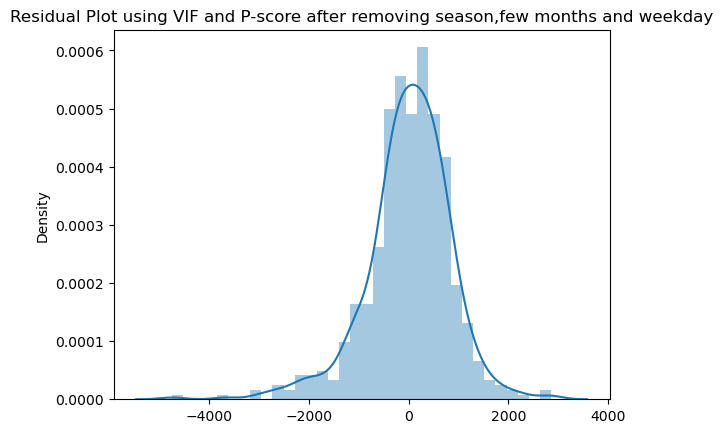

In [314]:
######Residual Analysis Code
y_train_pred=lr_model_season_month_weekday_drop.predict(X_train_season_months_weekday_DropVIF)
res=Y_train_lm-y_train_pred
sns.distplot(res)
plt.title("Residual Plot using VIF and P-score after removing season,few months and weekday")

##### 5.5 Making Predictions and R2 value

In [315]:
#####X_train_lm, X_test_lm, Y_train_lm, Y_test_lm
##### added with constant X_train_sm=sm.add_constant(X_train_lm)
#### add constant
X_test_lr_model_remove_season_days_fewmonths=X_test_lm.drop(['weekday_saturday','weekday_sunday','weekday_monday','weekday_tuesday',
                                               'weekday_wednesday','weekday_thursday',
                                               'season_spring','season_winter','season_summer','weathersit_mist',
                                       'mnth_aug','mnth_nov','mnth_may','mnth_jun'],axis=1)
X_test_lr_model_remove_season_days_fewmonths=sm.add_constant(X_test_lr_model_remove_season_days_fewmonths)
X_test_lr_model_remove_season_days_fewmonths.head()
Y_pred_lr_model_remove_season_days_fewmonths=lr_model_season_month_weekday_drop.predict(X_test_lr_model_remove_season_days_fewmonths)

Text(0, 0.5, 'Y_pred')

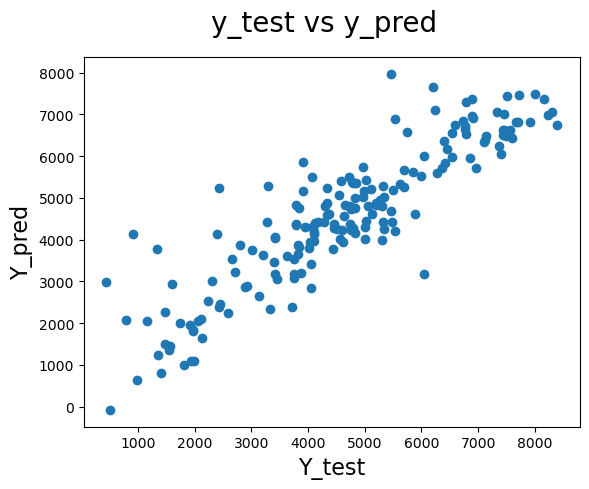

In [316]:
fig=plt.figure()
plt.scatter(Y_test_lm,Y_pred_lr_model_remove_season_days_fewmonths)
fig.suptitle("y_test vs y_pred",fontsize=20)
plt.xlabel("Y_test",fontsize=16)
plt.ylabel("Y_pred",fontsize=16)

In [317]:
r2_score(y_true=Y_test_lm,y_pred=Y_pred_lr_model_remove_season_days_fewmonths)

0.7925582153108037

### 6. Model building using Automated feature Selection using RFE

In [318]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
X_train_sm_lm=X_train_sm.drop(['const'],axis=1)

In [319]:
lm=LinearRegression()
lm.fit(X_train_sm_lm,Y_train_lm)
rfe=RFE(estimator=lm,n_features_to_select=10)
rfe =rfe.fit(X_train_sm_lm,Y_train_lm)

In [320]:
list(zip(X_train_sm_lm.columns,rfe.support_,rfe.ranking_))

[('atemp', True, 1),
 ('hum', False, 11),
 ('windspeed', False, 10),
 ('season_spring', True, 1),
 ('season_summer', False, 9),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 4),
 ('mnth_jul', False, 12),
 ('mnth_jun', False, 6),
 ('mnth_mar', False, 19),
 ('mnth_may', False, 7),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 18),
 ('mnth_sept', True, 1),
 ('holiday_1', True, 1),
 ('weekday_monday', False, 13),
 ('weekday_saturday', True, 1),
 ('weekday_sunday', False, 14),
 ('weekday_thursday', False, 16),
 ('weekday_tuesday', False, 15),
 ('weekday_wednesday', False, 17),
 ('workingday_working', True, 1),
 ('weathersit_clear', True, 1),
 ('weathersit_mist', True, 1)]

In [321]:
col=X_train_sm_lm.columns[rfe.support_]
col

Index(['atemp', 'season_spring', 'season_winter', 'yr_2019', 'mnth_sept',
       'holiday_1', 'weekday_saturday', 'workingday_working',
       'weathersit_clear', 'weathersit_mist'],
      dtype='object')

In [322]:
X_train_sm_lm.columns[~rfe.support_]

Index(['hum', 'windspeed', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov',
       'mnth_oct', 'weekday_monday', 'weekday_sunday', 'weekday_thursday',
       'weekday_tuesday', 'weekday_wednesday'],
      dtype='object')

In [323]:
X_train_sm_rfe=X_train_sm[col]
X_train_sm_rfe=sm.add_constant(X_train_sm_rfe)

In [324]:
X_train_sm_rfe.head()

,const,atemp,season_spring,season_winter,yr_2019,mnth_sept,holiday_1,weekday_saturday,workingday_working,weathersit_clear,weathersit_mist
311,1.0,-0.350016,0,1,0,0,0,0,1,1,0
523,1.0,0.801459,0,0,1,0,0,0,1,1,0
381,1.0,-0.647587,1,0,1,0,0,0,1,0,1
413,1.0,-0.702507,1,0,1,0,0,1,0,1,0
253,1.0,0.871975,0,0,0,1,0,0,0,1,0


In [325]:
lm_rfe=sm.OLS(Y_train_lm,X_train_sm_rfe).fit()

In [326]:
lm_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     254.2
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          3.62e-196
Time:                        16:35:00   Log-Likelihood:                -4443.0
No. Observations:                 547   AIC:                             8908.
Df Residuals:                     536   BIC:                             8955.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                892.2705    241.328      3.697      0.000     418.206    1366.335
atemp                838.1642     54.683     15.328      0.000     730.745     945.584
season_spring      -1059.8294    128.914     -8.221      0.000   -1313.067    -806.592
season_winter        471.8317    103.702      4.550      0.000     268.120     675.544
yr_2019             2028.9957     70.956     28.595      0.000    1889.610    2168.381
mnth_sept            630.7865    133.414      4.728      0.000     368.709     892.864
holiday_1           -642.6887    232.499     -2.764      0.006   -1099.410    -185.968
weekday_saturday     457.0259    128.150      3.566      0.000     205.289     708.763
workingday_working   410.0665    100.546      4.078      0.000     212.555     607.578
weathersit_clear    2633.6584    220.148     11.963      0.000    2201.201    3066.116
weathersit_mist     1954.3426    222.646      8.778      0.000    1516.976    2391.709
==============================================================================
Omnibus:                       75.773   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.870
Skew:                          -0.678   Prob(JB):                     9.84e-47
Kurtosis:                       5.731   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [327]:
vif_rfe_model=pd.DataFrame()
vif_rfe_model['Features']=X_train_sm_rfe.columns
vif_rfe_model['VIF']=[variance_inflation_factor(X_train_sm_rfe.values, i) for i in range(X_train_sm_rfe.shape[1])]
vif_rfe_model['VIF']=round(vif_rfe_model['VIF'], 2)
vif_rfe_model=vif_rfe_model.sort_values(by="VIF",ascending =False)
vif_rfe_model

,Features,VIF
0,const,46.96
9,weathersit_clear,9.17
10,weathersit_mist,9.08
2,season_spring,2.56
1,atemp,2.41
8,workingday_working,1.80
7,weekday_saturday,1.70
3,season_winter,1.60
6,holiday_1,1.16
5,mnth_sept,1.06


##### 6.1 Model Building using RFE and remvoing features with high VIF Manually

In [328]:
X_train_sm_rfe_mist=X_train_sm_rfe.drop(['weathersit_mist'],axis=1)

In [329]:
lm_rfe_mist=sm.OLS(Y_train_lm,X_train_sm_rfe_mist).fit()

In [330]:
lm_rfe_mist.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     240.0
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          8.63e-182
Time:                        16:35:03   Log-Likelihood:                -4479.8
No. Observations:                 547   AIC:                             8980.
Df Residuals:                     537   BIC:                             9023.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2724.1117    129.489     21.037      0.000    2469.744    2978.479
atemp                848.6630     58.413     14.529      0.000     733.917     963.409
season_spring      -1035.2840    137.707     -7.518      0.000   -1305.795    -764.773
season_winter        410.5909    110.551      3.714      0.000     193.426     627.756
yr_2019             2063.3073     75.699     27.257      0.000    1914.605    2212.009
mnth_sept            604.1442    142.511      4.239      0.000     324.197     884.091
holiday_1           -618.1506    248.399     -2.489      0.013   -1106.104    -130.197
weekday_saturday     424.7501    136.867      3.103      0.002     155.889     693.611
workingday_working   385.2349    107.387      3.587      0.000     174.285     596.185
weathersit_clear     812.6628     78.715     10.324      0.000     658.036     967.290
==============================================================================
Omnibus:                      122.255   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              481.183
Skew:                          -0.966   Prob(JB):                    3.25e-105
Kurtosis:                       7.169   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 6.2 Residual Analysis

Text(0.5, 1.0, 'Residual Plot using RFE and removing mist manually')

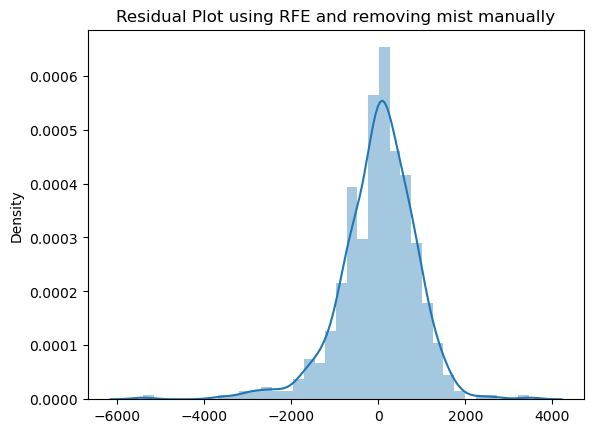

In [331]:
######Residual Analysis Code
y_train_pred=lm_rfe_mist.predict(X_train_sm_rfe_mist)
res=Y_train_lm-y_train_pred
sns.distplot(res)
plt.title("Residual Plot using RFE and removing mist manually")

#### 6.3 Making Predictions and calculate R2

In [332]:
#####X_train_lm, X_test_lm, Y_train_lm, Y_test_lm
##### added with constant X_train_sm=sm.add_constant(X_train_lm)
#### add constant
X_test_lm_RFE=X_test_lm[col]
X_test_lm_RFE_mist=X_test_lm_RFE.drop(['weathersit_mist'],axis=1)
X_test_lm_RFE_mist=sm.add_constant(X_test_lm_RFE_mist)
X_test_lm_RFE_mist.head()
Y_pred_lm_RFE_mist=lm_rfe_mist.predict(X_test_lm_RFE_mist)


Text(0, 0.5, 'Y_pred')

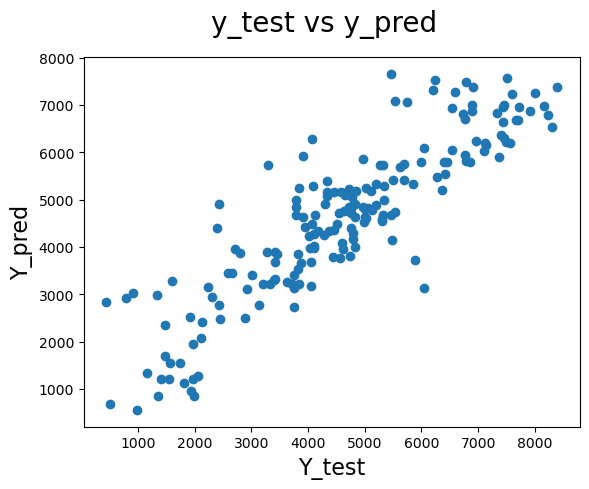

In [333]:
fig=plt.figure()
plt.scatter(Y_test_lm,Y_pred_lm_RFE_mist)
fig.suptitle("y_test vs y_pred",fontsize=20)
plt.xlabel("Y_test",fontsize=16)
plt.ylabel("Y_pred",fontsize=16)

In [334]:
r2_score(y_true=Y_test_lm,y_pred=Y_pred_lm_RFE_mist)

0.7773085235877405